In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('C:\\Users\\Administrator\\Documents\\kaggle\\train.csv\\train.csv')

In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [5]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

In [6]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [7]:
Y_train

array([1, 5, 6, ..., 5, 7, 7], dtype=int64)

In [8]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [9]:
def ReLU(Z):
    return np.maximum(Z, 0)


In [10]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [11]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [12]:
def ReLU_deriv(Z):
    return Z > 0

In [13]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [14]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [15]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [16]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [17]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[3 2 3 ... 3 2 3] [1 5 6 ... 5 7 7]
0.0744390243902439
Iteration:  10
[2 6 6 ... 7 6 6] [1 5 6 ... 5 7 7]
0.10639024390243902
Iteration:  20
[2 6 6 ... 7 8 8] [1 5 6 ... 5 7 7]
0.17326829268292682
Iteration:  30
[2 2 7 ... 7 8 7] [1 5 6 ... 5 7 7]
0.23426829268292684
Iteration:  40
[2 3 7 ... 7 8 7] [1 5 6 ... 5 7 7]
0.3131951219512195
Iteration:  50
[1 3 7 ... 7 8 7] [1 5 6 ... 5 7 7]
0.39463414634146343
Iteration:  60
[1 3 6 ... 7 8 7] [1 5 6 ... 5 7 7]
0.45726829268292685
Iteration:  70
[1 3 6 ... 2 2 7] [1 5 6 ... 5 7 7]
0.5041707317073171
Iteration:  80
[1 3 6 ... 2 2 7] [1 5 6 ... 5 7 7]
0.5454390243902439
Iteration:  90
[1 3 6 ... 2 2 7] [1 5 6 ... 5 7 7]
0.5782926829268292
Iteration:  100
[1 3 6 ... 2 2 7] [1 5 6 ... 5 7 7]
0.6061463414634146
Iteration:  110
[1 3 6 ... 2 2 7] [1 5 6 ... 5 7 7]
0.6284146341463415
Iteration:  120
[1 3 6 ... 2 2 7] [1 5 6 ... 5 7 7]
0.6485609756097561
Iteration:  130
[1 3 6 ... 2 2 7] [1 5 6 ... 5 7 7]
0.6658536585365854
Iteration:  

In [18]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


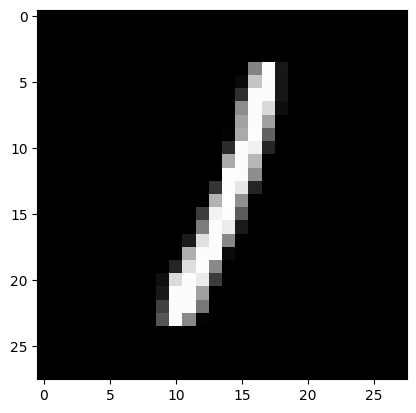

Prediction:  [5]
Label:  5


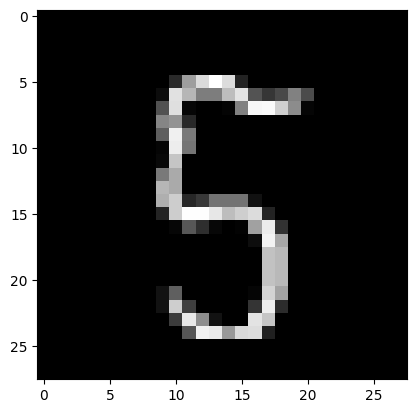

Prediction:  [6]
Label:  6


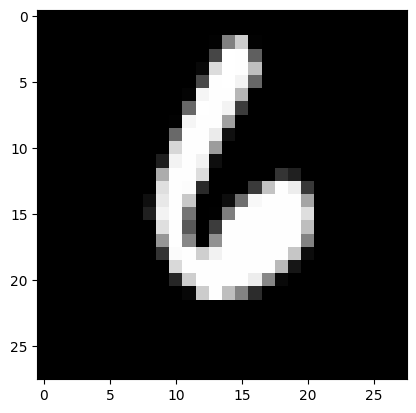

Prediction:  [6]
Label:  6


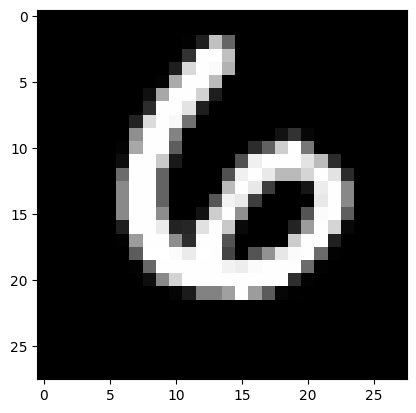

In [19]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [20]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 2 7 6 0 6 4 1 6 5 6 1 1 1 7 4 7 1 4 1 7 6 9 6 7 4 8 5 1 2 6 0 1 5 0 9 3
 1 3 2 8 9 1 4 7 4 0 2 4 3 9 6 7 8 0 1 8 9 1 7 5 1 0 1 4 0 9 3 9 0 8 0 6 8
 4 8 3 0 9 3 2 4 7 4 1 3 8 1 9 4 2 6 1 9 2 7 0 3 4 1 4 9 8 1 0 3 7 2 9 9 4
 4 2 8 0 3 9 9 4 3 1 5 8 7 0 3 7 6 2 7 7 5 1 7 8 6 2 9 4 0 8 1 0 3 1 4 0 8
 8 4 1 8 0 7 1 0 2 2 8 5 1 2 4 0 7 7 9 8 0 0 4 8 5 1 1 0 3 8 0 3 1 0 0 9 9
 2 7 5 0 8 4 3 9 2 7 3 1 0 1 1 1 8 4 6 8 8 4 0 9 5 0 7 7 5 6 7 5 7 9 0 3 5
 2 6 7 5 6 8 9 3 0 4 6 4 0 8 1 0 1 6 4 5 8 3 3 4 9 7 1 6 6 8 8 1 6 6 6 8 5
 6 2 6 4 0 8 9 2 0 9 4 9 6 1 0 5 2 3 6 2 4 5 3 9 6 1 1 8 5 3 6 5 1 4 0 2 3
 4 1 9 7 0 0 6 5 4 6 6 6 8 1 8 8 1 3 4 3 8 1 4 5 0 0 3 6 7 1 6 9 7 3 9 3 2
 9 2 3 7 4 0 2 6 6 1 4 4 0 5 3 0 3 3 2 4 3 6 9 4 4 3 6 2 8 6 3 1 3 1 3 3 3
 8 8 7 1 4 3 2 3 0 6 3 3 7 3 3 3 4 7 9 3 7 9 9 3 1 9 6 3 0 3 0 5 3 9 7 7 3
 7 4 5 2 6 5 1 8 3 0 2 2 7 3 6 9 9 7 5 2 3 0 0 5 8 8 9 7 7 7 4 7 8 9 1 2 7
 7 9 6 7 5 1 0 2 1 3 6 7 6 9 7 6 5 5 2 6 0 2 5 6 1 6 5 0 9 0 2 5 6 3 5 7 5
 5 2 6 7 3 7 2 1 7 7 2 2 

0.861